<a href="https://colab.research.google.com/github/alvaroamor/alvaroamor/blob/master/Lab7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Interpolation**

In [0]:
# Lagrange Polynomials in Python
import numpy as np
from random import *

def  lagrange(x,i,xm):
  """
  Evaluates  the i-th  Lagrange  polynomial  at point x 
  based on grid  data xm
  """
  n=len(xm)-1
  y=1.
  for j in  range(n+1):
    if i!=j:
      y*=(x-xm[j])/(xm[i]-xm[j])
  return y


def  interpolation(x,xm ,ym):
  n=len(xm)-1
  lagrpoly=np.array([lagrange(x,i,xm) for i in range(n+1)])
  y = np.dot(ym ,lagrpoly)
  return y


pts = randint(3,20)
xm = np.linspace(0,10,pts)
ym = np.sin(xm)
xplot = np.linspace(-0.1,10.1,100)
yplot = interpolation(xplot, xm, ym)

print('X dataponts: ',xm)
print('Y dataponts: ',ym)



## We write the code for the error

error = abs(yplot-np.sin(xplot))





X dataponts:  [ 0.          0.76923077  1.53846154  2.30769231  3.07692308  3.84615385
  4.61538462  5.38461538  6.15384615  6.92307692  7.69230769  8.46153846
  9.23076923 10.        ]
Y dataponts:  [ 0.          0.69558279  0.99947728  0.740558    0.06462451 -0.64769957
 -0.99529876 -0.78243716 -0.12897884  0.5971085   0.98695921  0.82104518
  0.19279396 -0.54402111]


# **Plot the results**

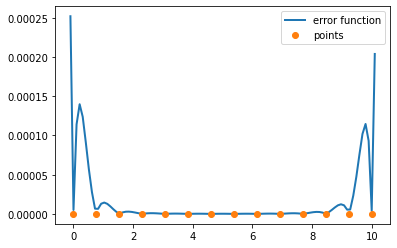

In [0]:

def polyplot(xm, ym, xplot, yplot):
  # Import pyplot as plt
  import matplotlib.pyplot as plt

  #plot the function
  yy = np.linspace(0,0,len(xm))
  plt.plot(xplot, error, lw=2, label='error function')
  plt.plot(xm, yy, 'o', label='points')

  plt.legend()
  plt.show()

polyplot(xm, ym, xplot, yplot)  


# **Newton base**

In [0]:
def poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y).astype(float)

    for k in range(1, m):
        for i in range(m-1, k-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-k])
            
    return a

def newton_interpolation(x, x_data, y_data):
    """
    x: evaluation point(s)
    x_data: data points at x
    y_data: data points at y
     """
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    print("array a = ",a)

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p



#xm = np.array([-1,0,1,2])
#ym = np.array([5,1,1,11])
#xplot = np.linspace(-1.1,2.1,100)
#xplot = np.array([-1,0,1,2])

xm = np.array([1,2,3,4,5,6])
ym = np.array([-3,0,-1,2,1,4])
xplot = np.linspace(0.9,6.1,100)
yplot = newton_interpolation(xplot, xm, ym)



array a =  [-3.          3.         -2.          1.33333333 -0.66666667  0.26666667]


# **Plot the results**

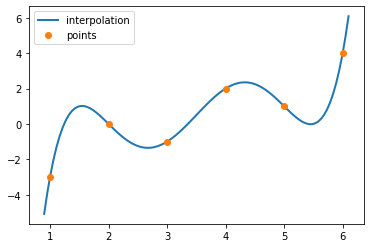

In [0]:
polyplot(xm, ym, xplot, yplot) 